Abaixo faremos e testaremos uma função de anos e meses que retorna para anos decimais

In [135]:
import numpy as np
arquivo= np.loadtxt('dados/0.80S-49.02W-TAVG-Trend.txt', comments='%')
anos = arquivo[:, 0]
meses = arquivo[:, 1]

In [136]:
def ano_decimal_teste(anos, meses):
    assert type(anos) ==np.ndarray, 'Tipo de variável errada. Use um array'
    assert type(meses) ==np.ndarray, 'Tipo de variável errada.Use um array'
    return ((meses -1)/12 + anos)
   

In [137]:
ano_decimal_teste(3,1)

AssertionError: Tipo de variável errada. Use um array

In [138]:
ano_decimal_teste(anos, meses)

array([ 1845.        ,  1845.08333333,  1845.16666667, ...,  2013.5       ,
        2013.58333333,  2013.66666667])

Faremos uma funcao de ano decimal x anomalia de temperatura (dados de temperatura), retornando os anos decimais, a anomalia anual, anomalia de 10 anos e sua incerteza. 

In [139]:
def temp(arquivo):
    assert type(arquivo) ==np.ndarray, 'Tipo de variável errada. Use um array.'
    ano_decimal = ano_decimal_teste (arquivo[:, 0],arquivo[:, 1])
    anomalia_temperatura =np.nan_to_num(arquivo[:, 4])
    anomalia_dez =np.nan_to_num(arquivo [:, 8])
    incerteza =np.nan_to_num(arquivo[:, 9])
    return (ano_decimal, anomalia_temperatura, anomalia_dez, incerteza)

Testamos a função com os dados que já foram carregados

In [140]:
temp(arquivo)

(array([ 1845.        ,  1845.08333333,  1845.16666667, ...,  2013.5       ,
         2013.58333333,  2013.66666667]),
 array([ 0.   ,  0.   , -0.872, ...,  0.   ,  0.   ,  0.   ]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
dados= glob.glob('dados/*.txt')

Plotamos o gráfico com a função que iremos definir para vários arquivos

In [142]:
def plotar_graficos(arquivo):
    dados= np.loadtxt(arquivo, comments='%')
    ano_decimal = ((dados[:, 1] -1)/12 + dados[:, 0])
    anomalia_temperatura = dados[:, 4]
    anomalia_dez = dados[:, 8]
    incerteza = dados [:, 9]
    plt.figure()
    plt.plot(ano_decimal, anomalia_temperatura, 'k-')
    plt.title('Brazil')
    plt.xlabel('Ano')
    plt.ylabel('Anomalia de Temperatura(°C)')
    plt.plot(ano_decimal, dados[:, 8], 'r-')
    plt.fill_between (ano_decimal, anomalia_temperatura + 2, anomalia_temperatura - 2, color='gray')
    plt.savefig(arquivo[0:-3]+'png')
    




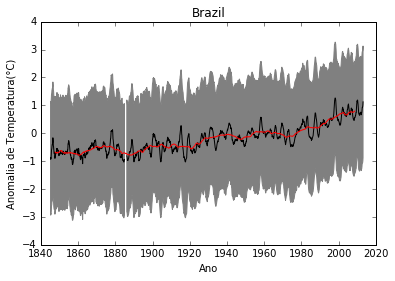

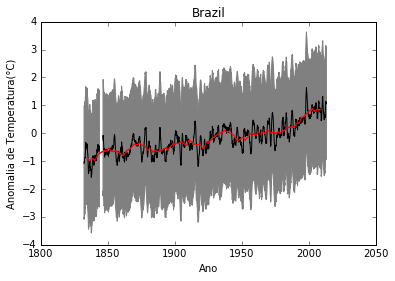

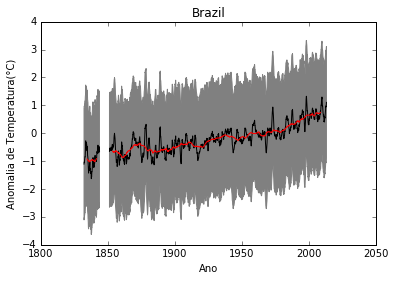

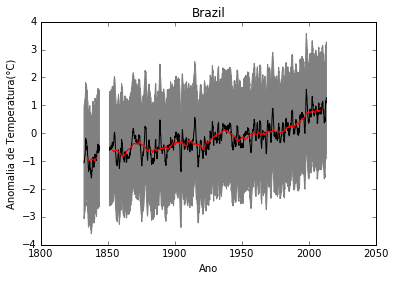

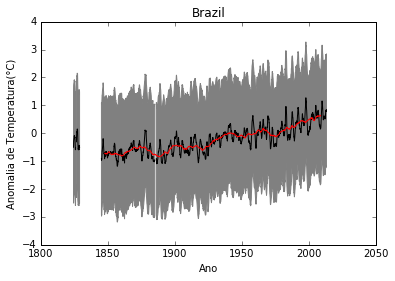

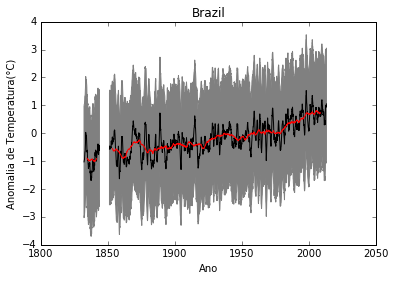

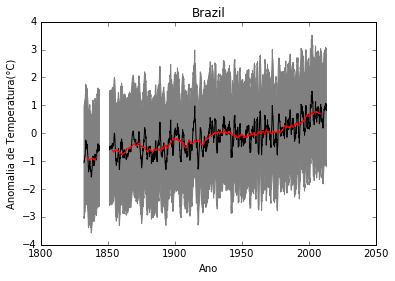

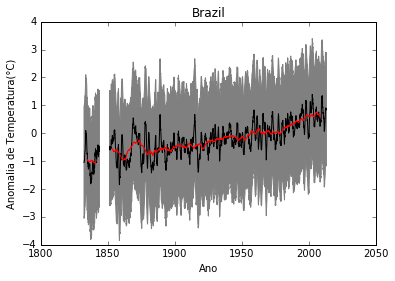

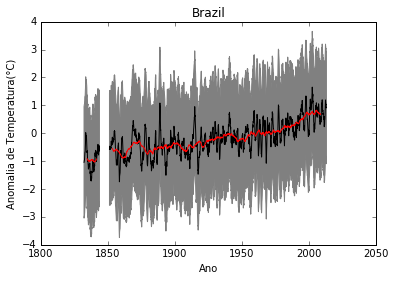

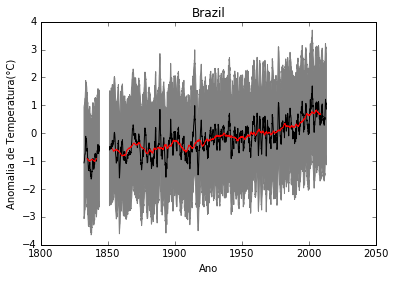

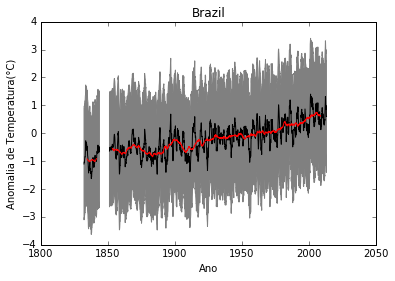

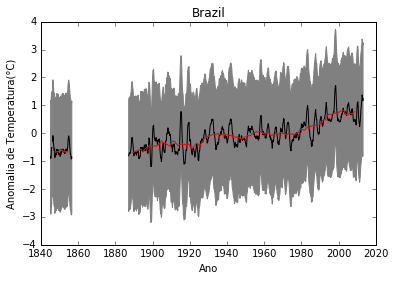

In [143]:
for arquivo in dados[0:12]:
    plotar_graficos(arquivo)